In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.integrate as integrate

In [2]:
n=10 #Como la función es simetrica alredor de 0,
     # podemos definir un n que genere el intervalo
     # dónde graficaremos

In [3]:
def Prior(p):
    return np.piecewise( p, [p>= -n and p <= n, p<-n and p > n], [lambda p: 1, lambda p:0])

In [4]:
Prior = np.vectorize(Prior)

In [6]:
def Likelihood(p,xinit,gama):
    return 1/(np.pi*(1+((p-xinit)/gama)**2))

In [7]:
def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)

In [8]:
p = np.linspace(-n,n,10000)
gama = 1
xinit = 0
Pos = Posterior(p,xinit,gama)

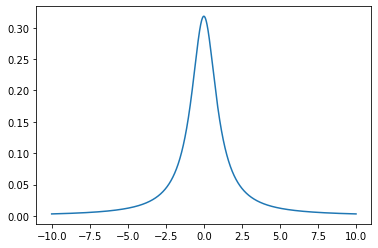

In [9]:
plt.plot(p,Pos)

In [10]:
I,_ = integrate.quad(Posterior,p[0],p[-1],args=(xinit,gama))
I

0.9365489651388933

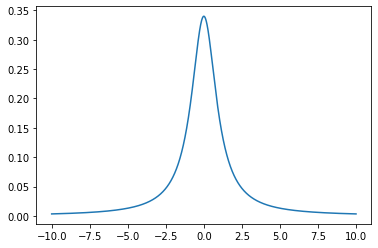

In [11]:
plt.plot(p, Pos/I)

In [12]:
def Metropolis(x0, Posterior, NSteps=int(1e4), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(x[i-1],xinit,gama)
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Posterior(xf,xinit,gama)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[1000:,:]

In [15]:
initparams = np.array([-10])
MCMC = Metropolis(initparams,Posterior)

100%|████████████████████████████| 9999/9999 [00:01<00:00, 8329.41it/s]


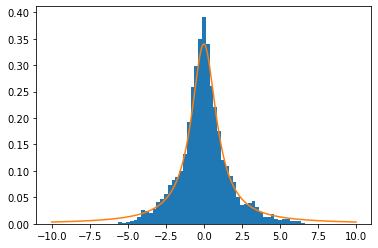

In [16]:
plt.hist(MCMC,density=True,bins=50)
plt.plot(p,Pos/I)